# Extreme Gradient Boosting

`XGBoost` is well known to provide better solutions than other machine learning algorithms. In face, since its inception, it has become the 'state-of-the-art' machine learning algorithm to deal with structured data.

- **Speed and performance**: Originally written in C++, it is comparatively faster than other ensemble classifiers.

- **Core algorithm is parallelizable**: Because the core XGBoost algorithm is parallelizable, it can harness the power of multi-core computers. It is also parallelizable onto GPUs and across networks of computers making it feasible to train on very large datasets as well.

- **Consistently outperforms other algorithm methods**: It has shown better performance on a variety of machine learning benchmark datasets.

- **Wide variety of tuning parameters**: `XGBoost` internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API, etc.

### Boosting

Boosting is a sequenctial technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuary. At any instant `t`, the model outcomes are weighed based on the outcomes of previous instant `t-1`.

The outcomes predicted correctly are given a lower weight and the ones misclassified are weighted higher. Note that a weak learner is one which is _slightly_ better than random guessing.

To begin with, you should know about the default base learnes of `XGBoost`: **Tree Ensembles**. The _tree ensemble_ model is a set of classification and regression trees or `CART`. The trees are grown one after another, and attempts to reduce the misclassification rate are made in subsequent iterations.

Each tree gives a different prediction score depending on the data it sees and the scores of each individual tree are summed up to get the final score.

### Using `XGBoost` in Python

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [6]:
print(boston.data.shape)

(506, 13)


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
data['Price'] = boston.target

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# separate target variable and rest of the variables using `.iloc` tp subset the data
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [15]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

/opt/homebrew/Caskroom/miniforge/base/envs/lighthouse/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [40]:
data_dmatrix.set_group

<bound method DMatrix.set_group of <xgboost.core.DMatrix object at 0x174bbfbb0>>

### XGBoost's Hyperparameters

At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. THere are a plethora of tuning parameters for tree-based learnings in XGBoost, but the most common ones are:
- `learning_rate`: step size shrinkage used to prevent overfitting, range(0,1).
- `max_depth`: determines how deeply each tree is allowed to grow during any boosting round.
- `subsample`: percentage of samples used per tree. Low value can lead to underfitting.
- `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
- `n_estimators`: number of trees you want to build.
- `objective`: determines the loss function to be used like `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.
- `gamma`: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- `alpha`: L1 regularization on leaf weights. A large value leads to more regularization.
- `lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.

It is also possible to use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. ALl you have to do is set the booster parameter to either `gbtree` (default), `gblinear`, or `dart`.

Now, create the train and test set for cross-validation of the results using the `train_test_split` function with `test-size` at 20% of the data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate on XGBoost regressor object by calling the `XGBRegressor()` class from the XGBoost library with the hyperparameters pass as arguments. For classification problems, you would have used the `XGBClassifier()` class.

In [17]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [18]:
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


### `k-fold` Cross Validation using XGBoost

In order to build more robust models, it is common to do a `k-fold` cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once.

XGBoost supports `k-fold` cross validation via the `cv()` method, with `nfolds` parameter specified. It also supports many other parameters:
- `num_boost_round`: denotes the number of trees you build
- `metrics`: tells the evaluation metrics to be watched during CV
- `as_pandas`: to return the results in a pandas DataFrame
- `early_stopping_rounds`: finishes training of the model early if the hold-out metric (RMSE in our case) does not improve for a given number of rounds

Create a hyperparameter dictionary `params` which holds all the hyperparameters and their values as key-value pairs but will exclude the `n_estimators` from the hyperparameter dictionary because you will use `num_boost_rounds` instead.

In [20]:
# build a 3-fold cross validation model by invoking XGBoost's cv() method adn store the results in a `cv_results` DataFrame
# note that we are using `data_dmatrix` object created before

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

In [21]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680257,0.025607,21.719121,0.019025
1,19.740499,0.072068,19.818879,0.061769
2,18.007202,0.119744,18.109862,0.129375
3,16.463924,0.115086,16.587235,0.182340
4,14.990313,0.112001,15.132976,0.166282


In [22]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.862102
Name: test-rmse-mean, dtype: float64


You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search, and Bayesian Optimization to reach the optimal set of hyperparameters.

### Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a `plot_tree()` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the `plot_tree()` function along with the number of trees you want to plot using the `num_trees` argument.

In [23]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

ImportError: You must install graphviz to plot tree

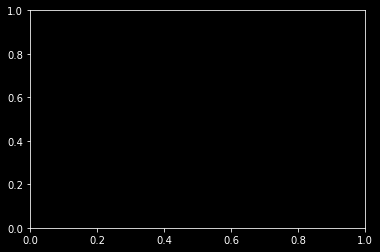

In [24]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

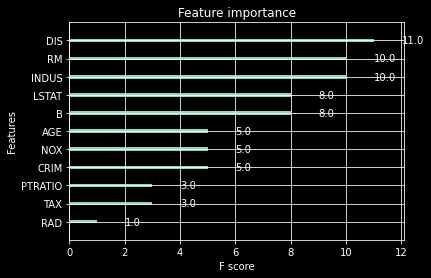

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()